# SDTEF
# Homelessness Program Analysis Using Point-in-Time(PIT) Count 

## Setup

In [75]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
# read in dataset
dat = pd.read_csv('data/processed/expenditures_and_PIT.csv')
dat.head()

,City,Year,Total PEH,Unsheltered PEH,Population,"PEH Per 100,000","Unsheltered Per 100,000",Grantee,Program,Amount,ExpenditureType
0,El Cajon,2014,711,191,103230,688.753269,185.023733,East County Transitional Living Center,emergency shelter,75000.0,Crisis Management
1,El Cajon,2014,711,191,103230,688.753269,185.023733,East County Transitional Living Center,emergency shelter,75000.0,Crisis Management
2,El Cajon,2015,321,218,103527,310.064041,210.573087,East County Transitional Living Center,emergency shelter,120000.0,Crisis Management
3,El Cajon,2015,321,218,103527,310.064041,210.573087,East County Transitional Living Center,emergency shelter,120000.0,Crisis Management
4,San Marcos,2015,99,44,94932,104.285173,46.348966,North County Lifeline,housing assistance,21600.0,Prevention


## Visualization

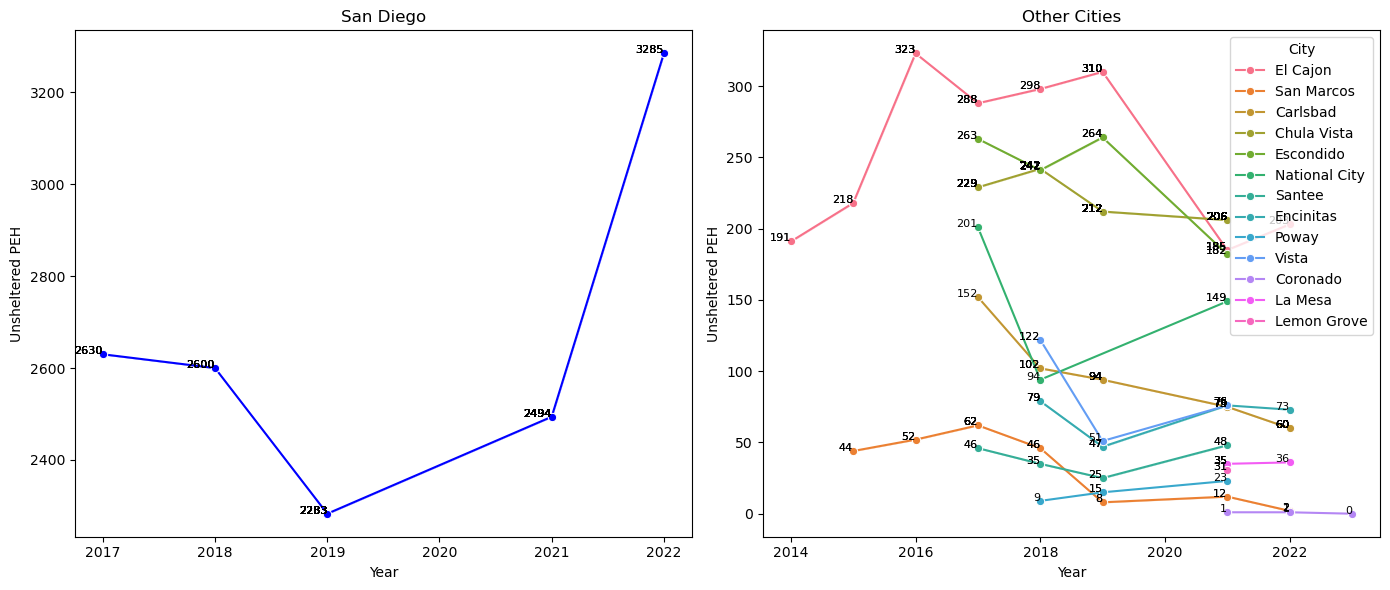

In [77]:
# Filter the data for 'San Diego' and 'Other Cities'
san_diego_data = dat[dat['City'] == 'San Diego']
other_cities_data = dat[dat['City'] != 'San Diego']

# Create subplots: a 2x2 grid where the third plot spans the entire bottom row
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for 'San Diego' (top-left)
sns.lineplot(data=san_diego_data, x='Year', y='Unsheltered PEH', marker='o', ax=axes[0], color='blue')
axes[0].set_title('San Diego')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Unsheltered PEH')

# Annotate points for 'San Diego'
for i in range(len(san_diego_data)):
    axes[0].text(san_diego_data['Year'].iloc[i], san_diego_data['Unsheltered PEH'].iloc[i],
                    str(san_diego_data['Unsheltered PEH'].iloc[i]), 
                    fontsize=8, ha='right')

# Plot for 'Other Cities' (top-right) with different colors for each city
sns.lineplot(data=other_cities_data, x='Year', y='Unsheltered PEH', hue='City', marker='o', ax=axes[1])
axes[1].set_title('Other Cities')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Unsheltered PEH')

# Annotate points for 'Other Cities'
for i in range(len(other_cities_data)):
    axes[1].text(other_cities_data['Year'].iloc[i], other_cities_data['Unsheltered PEH'].iloc[i],
                    str(other_cities_data['Unsheltered PEH'].iloc[i]), 
                    fontsize=8, ha='right')

plt.tight_layout()
plt.show()

## Programs Analysis

List of 25 types of  programs.

In [78]:
print(dat['Program'].unique())

['emergency shelter' 'housing assistance' 'staff and operations'
 'housing navigation services' 'rental assistance' 'homeless services'
 'motel voucher' 'homelessness prevention' 'family reunification program'
 'transitional housing' 'rapid re housing' 'food and nutrition'
 'neighborhood revitalization services' 'opening doors program'
 'bridge to housing network' 'outreach' 'safe parking' 'project h.o.p.e.'
 'service center' 'restrooms' 'take back the streets' 'work for hope'
 'flexible funds' 'housing stability services' 'homeshare program']


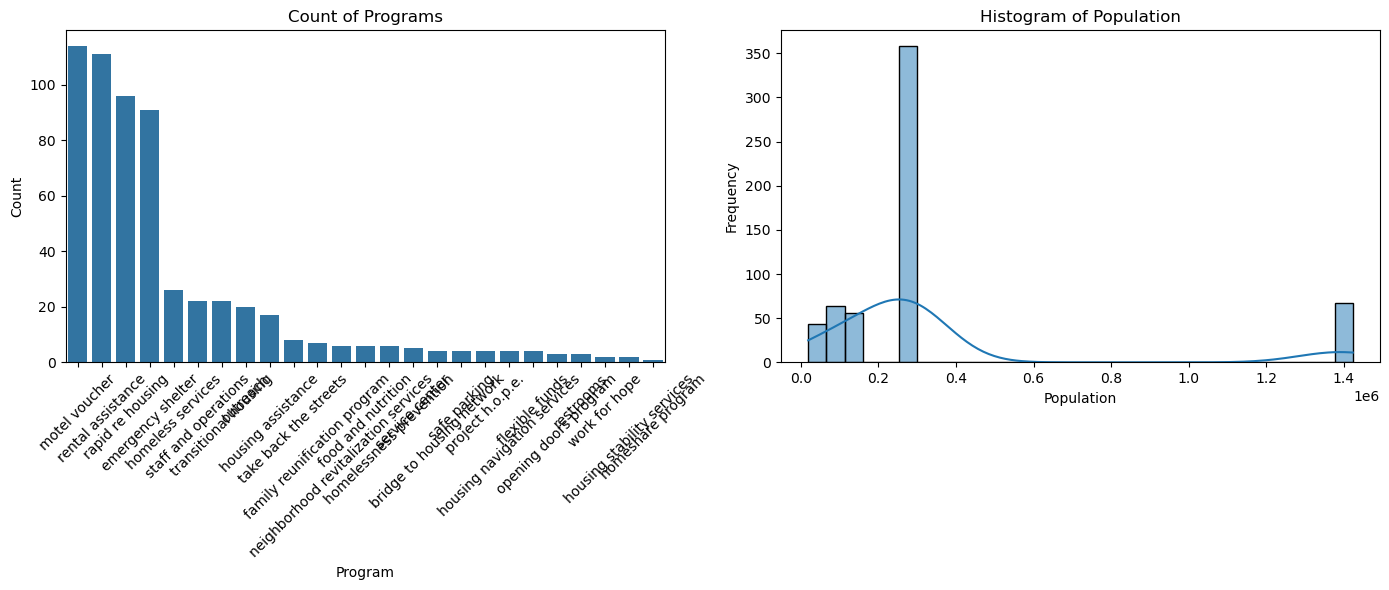

In [79]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Bar plot for 'Program'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(data=dat, x='Program', order=dat['Program'].value_counts().index)
plt.title('Count of Programs')
plt.xlabel('Program')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Histogram for 'Population'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(data=dat, x='Population', bins=30, kde=True)  # kde=True adds a density curve
plt.title('Histogram of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Will use regression to model the relationships

In [98]:
X = dat[['City','Year','Population','Program','Amount','ExpenditureType']].copy()
data_encoded = pd.get_dummies(X, columns=['City','Program','ExpenditureType'], drop_first=False)

# Define the target variable
y = dat['Unsheltered PEH'].copy()

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')


ValueError: could not convert string to float: 'El Cajon'